In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
    
%matplotlib inline

# Data Organizing

In [2]:
#uploading enrolees data
data = pd.read_csv('data/CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [4]:
data.shape

(4340, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [7]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

name - name of the model(Categorial)       
year - year of production(Ordinal)       
selling_price - the selling price of the car(Numeric)     
km_driven - (Numeric)     
fuel - type of fuel(Categorial)     
seller_type -(Categorial)     
transmission - (Categorial)
owner - th owner(Categorial)

In [8]:
data['fuel'].value_counts(normalize=True).map("{:.2%}".format)

Diesel      49.61%
Petrol      48.92%
CNG          0.92%
LPG          0.53%
Electric     0.02%
Name: fuel, dtype: object

In [9]:
data['seller_type'].value_counts(normalize=True).map("{:.2%}".format)

Individual          74.75%
Dealer              22.90%
Trustmark Dealer     2.35%
Name: seller_type, dtype: object

In [10]:
data['transmission'].value_counts(normalize=True).map("{:.2%}".format)

Manual       89.68%
Automatic    10.32%
Name: transmission, dtype: object

In [11]:
data['owner'].value_counts(normalize=True).map("{:.2%}".format)

First Owner             65.25%
Second Owner            25.48%
Third Owner              7.00%
Fourth & Above Owner     1.87%
Test Drive Car           0.39%
Name: owner, dtype: object

# Vizualizing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB181ABDC0>,
      dtype=object)

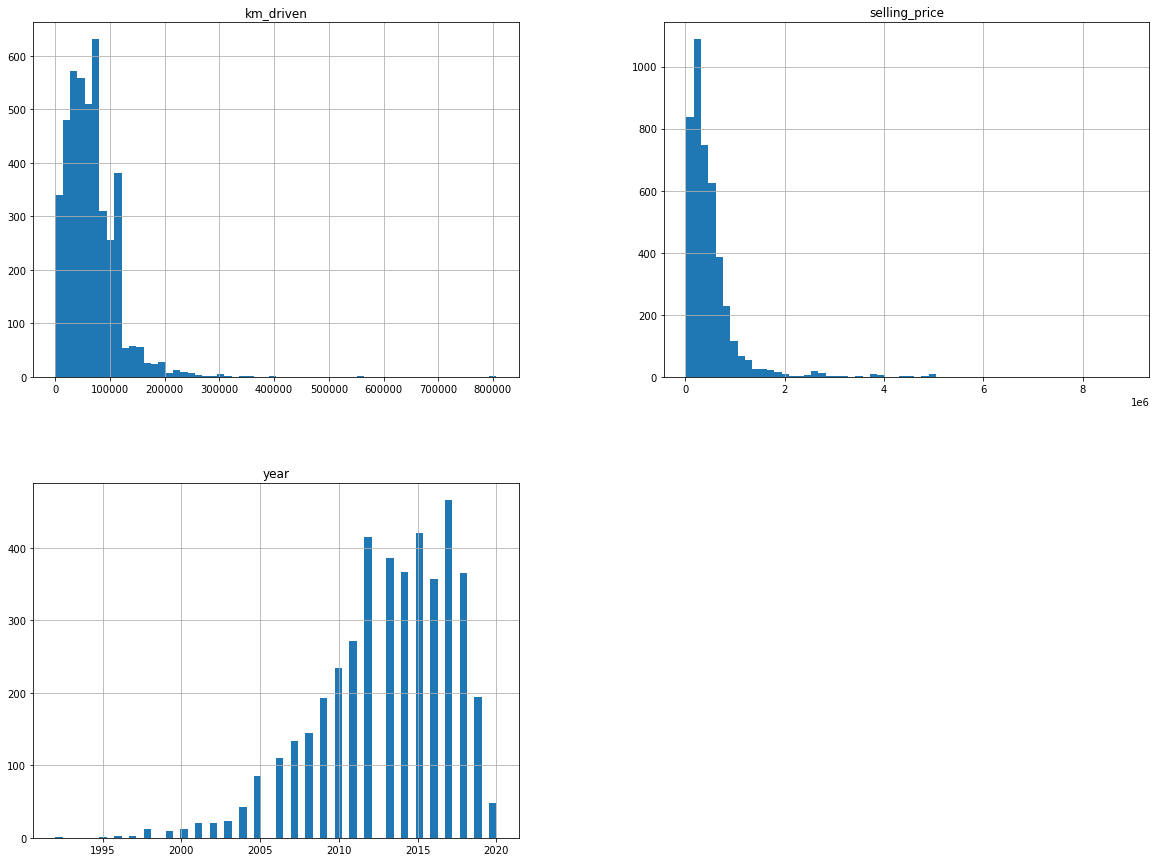

In [12]:
data.hist(bins=60, figsize=(20,15))

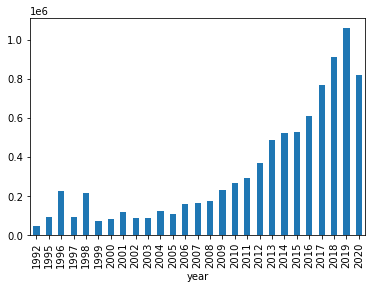

In [13]:
data.groupby('year').mean()['selling_price'].plot.bar()

We can infer that the average selling price increase over the years

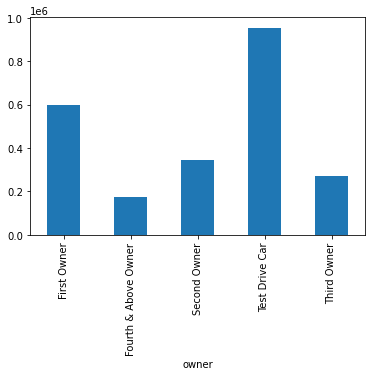

In [14]:
data.groupby('owner').mean()['selling_price'].plot.bar()

From second owner, the owner type importance decreases

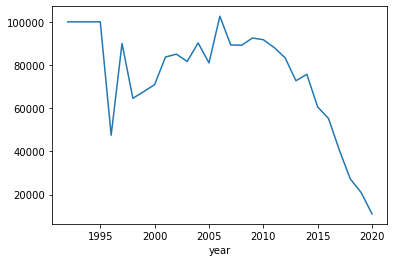

In [15]:
data.groupby('year').mean()['km_driven'].plot()

The average km driven dependent on the manufecturing year

In [16]:
data['manufacturer'] = data.name.str.split(' ', n = 1, expand = True)[0]

<BarContainer object of 4340 artists>

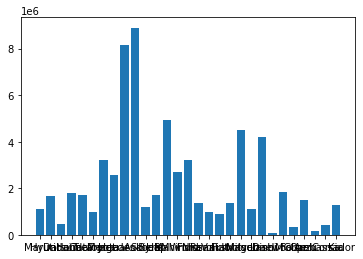

In [17]:
plt.bar(data['manufacturer'], data['selling_price'],)

To a manufacturer feaure have influence on the selling price

# Data Preparation

In [18]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
featuresB = ['year', 'selling_price','km_driven']
df = data[featuresB]
data = data.drop(columns=featuresB)
data = data.apply(enc.fit_transform)
data[featuresB] = df[featuresB]

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
featuresA = ['name', 'fuel', 'seller_type','selling_price', 'transmission', 'owner']
df = data[featuresA]
data = data.drop(columns=featuresA)
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
data[featuresA] = df[featuresA]

In [20]:
data.head()

,manufacturer,year,km_driven,name,fuel,seller_type,selling_price,transmission,owner
0,0.358173,-1.445074,0.081139,775,4,1,60000,1,0
1,0.358173,-1.445074,-0.347689,1041,4,1,135000,1,0
2,-0.816674,-0.258795,0.724381,505,1,1,600000,1,0
3,-1.550953,0.927485,-0.433455,118,4,1,250000,1,0
4,-0.963530,0.215717,1.603479,279,1,1,450000,1,2


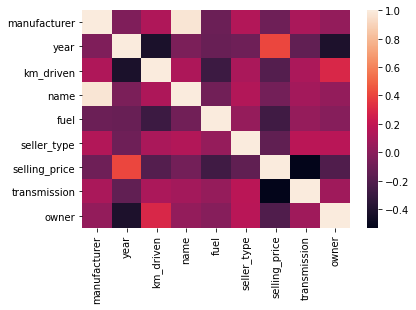

In [21]:
sns.heatmap(data.corr())

In [22]:
data.corr()['selling_price']

manufacturer    -0.096858
year             0.413922
km_driven       -0.192289
name            -0.077598
fuel            -0.269653
seller_type     -0.151554
selling_price    1.000000
transmission    -0.530205
owner           -0.207840
Name: selling_price, dtype: float64

In [23]:
data.drop(columns=['name'], inplace=True)

The feature of name influence badly on the model accuracy

In [24]:
fuel = pd.get_dummies(data['fuel'], drop_first=True)
seller_type = pd.get_dummies(data['seller_type'], drop_first=True)
transmission = pd.get_dummies(data['transmission'], drop_first=True)
owner = pd.get_dummies(data['owner'], drop_first=True)
features_to_drop = ['fuel' ,'seller_type', 'transmission', 'owner']
data.drop(columns=features_to_drop, inplace = True)
data = pd.concat([data, fuel, seller_type, transmission, owner], axis=1)

# Models Training And Evaluating

In [25]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
data_labels = data.drop(['selling_price'], axis=1)
data_target = data['selling_price']
x_train, x_test, y_train, y_test = train_test_split(data_labels, data_target, test_size = 0.3, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
data_prediction = lin_reg.predict(x_test)
lin_mse = mean_squared_error(data_prediction, y_test)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(data_prediction, y_test)
lin_2_score = r2_score(data_prediction, y_test)
print("rmse:", lin_rmse)
print("mae",lin_mae)
print("r2_score",lin_2_score)

rmse: 402705.2911336814
mae 219476.9575115718
r2_score -0.0546851479041055


In [27]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(x_train, y_train)
data_prediction = dummy_regr.predict(x_test)
dummy_mse = mean_squared_error(data_prediction, y_test)
dummy_rmse = np.sqrt(dummy_mse)
print("rmse:",dummy_rmse)

rmse: 544099.5844753586


(array([391., 613., 676., 575., 415., 443., 250., 248., 180., 117.,  56.,
         64.,  41.,  42.,  35.,  14.,  19.,  18.,  12.,  10.,  12.,   7.,
          7.,   2.,   1.,   2.,   2.,   5.,   3.,  16.,   8.,   5.,   2.,
          0.,   4.,   3.,   1.,   0.,   0.,   2.,   0.,   0.,  11.,   2.,
          3.,   0.,   0.,   1.,   0.,   2.,   3.,   0.,   1.,   2.,   0.,
         11.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  20000.,  108800.,  197600.,  286400.,  375200.,  464000.,
         552800.,  641600.,  730400.,  819200.,  908000.,  996800.,
        1085600., 1174400., 1263200., 1352000., 1440800., 1529600.,
        1618400., 1707200., 1796000., 1884800., 1973600., 2062400.,
        2151200., 2240000., 2328800., 2417600.

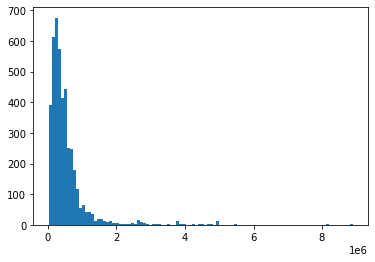

In [28]:
plt.hist(data['selling_price'], bins=100)

In [29]:
data['selling_price'].std()

578548.7361388853

In [30]:
data['selling_price'].mean()

504127.3117511521

We can see that the selling prices distribute normally